In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Pune_house_data.csv')

In [3]:
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


## Check Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.describe(include='object')

,area_type,availability,size,society,total_sqft,site_location
count,13320,13320,13304,7818,13320,13319
unique,4,81,31,2688,2117,97
top,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,Alandi Road
freq,8790,10581,5199,80,843,139


## Split Data

In [8]:
X = df.drop(columns = ['price'])
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Availability Column

In [9]:
df['availability'].unique()


array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [11]:
#we can vhange all the dates with Not Ready to move and Ready To Move or Immediate Possession to Ready to move
def availabity(val):
    if val=='Ready To Move' or val== 'Immediate Possession':
        return 'Ready to Move'
    else:
        return 'Not Ready to Move'

X_train['availability'] = X_train['availability'].apply(availabity)
X_test['availability'] = X_test['availability'].apply(availabity)


In [12]:
X_train['availability'].value_counts()

Ready to Move        8480
Not Ready to Move    2176
Name: availability, dtype: int64

#### Size Column

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
#remove the string and make column float 
X_train['size'] = X_train['size'].astype(str)

X_train['size'] = X_train['size'].str.extract('(\d+)')
X_train['size']=X_train['size'].astype('float64')

X_test['size'] = X_test['size'].astype(str)

X_test['size'] = X_test['size'].str.extract('(\d+)')
X_test['size']=X_test['size'].astype('float64')

df['size'] = df['size'].astype(str)

df['size'] = df['size'].str.extract('(\d+)')
df['size']=df['size'].astype('float64')


In [15]:
X_train['size'].unique()

array([ 3.,  2.,  4.,  1.,  8.,  9.,  5., 27., 11.,  6.,  7., nan, 10.,
       16., 13., 12., 14., 18.])

#### Total sqft Column

In [18]:
#total sqrt is object so we should make it float
X_train['total_sqft'].unique()
#there are ranges like  1076 - 1199 so we will clear this ranges by set median of them and after that make it float


array(['1530', '1310', '2400', ..., '1440 - 1884', '3161', '1437'],
      dtype=object)

In [19]:
def convert_area(value):
    if '-' in value:
        low, high = map(float, value.split('-'))
        return (float(low) + float(high)) / 2
    try:
        return float(value)
    except:
        return None


X_train['total_sqft'] = X_train['total_sqft'].apply(convert_area)
X_train['total_sqft'] = X_train['total_sqft'].astype('float')

X_test['total_sqft'] = X_test['total_sqft'].apply(convert_area)
X_test['total_sqft'] = X_test['total_sqft'].astype('float')

df['total_sqft'] = df['total_sqft'].apply(convert_area)
df['total_sqft'] = df['total_sqft'].astype('float')

In [20]:
X_train['total_sqft'].value_counts()

1200.00    661
1100.00    176
1500.00    173
2400.00    148
1000.00    144
          ... 
1473.00      1
3190.00      1
2162.03      1
2845.00      1
1437.00      1
Name: total_sqft, Length: 1842, dtype: int64

## EDA

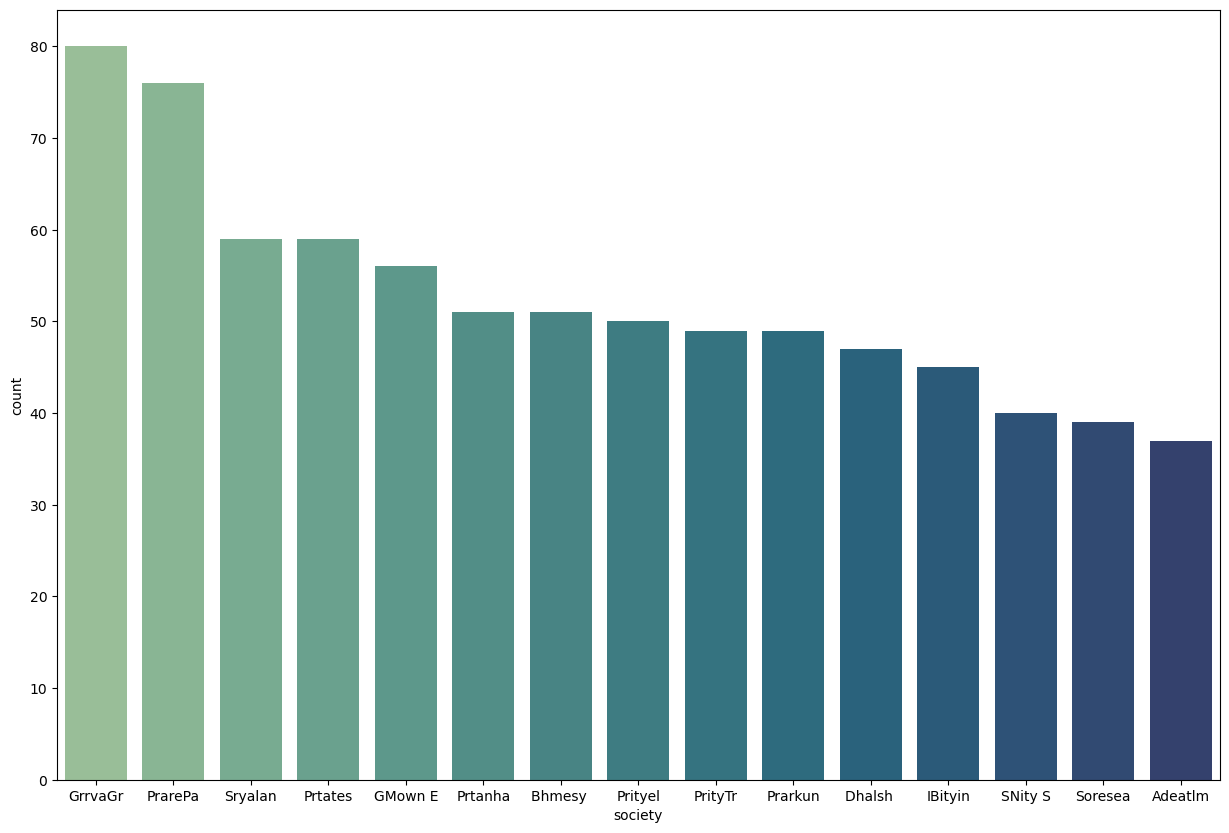

In [21]:
fig = plt.figure(figsize=(15,10))

sns.countplot(x = 'society', data = df, order = df['society'].value_counts().index[:15],palette='crest')
plt.show()

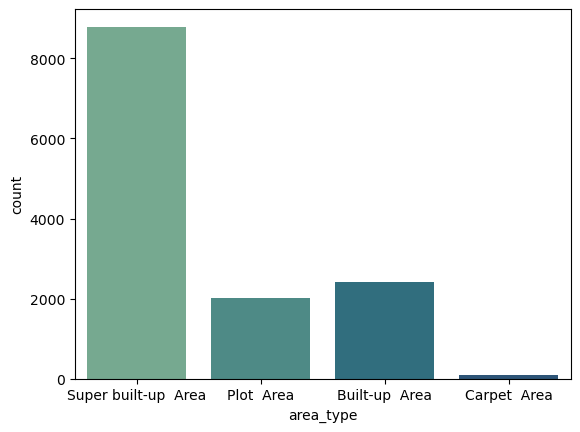

In [22]:
sns.countplot(data=df,x='area_type',palette='crest')
plt.show()

skewness : 2.922388340212632


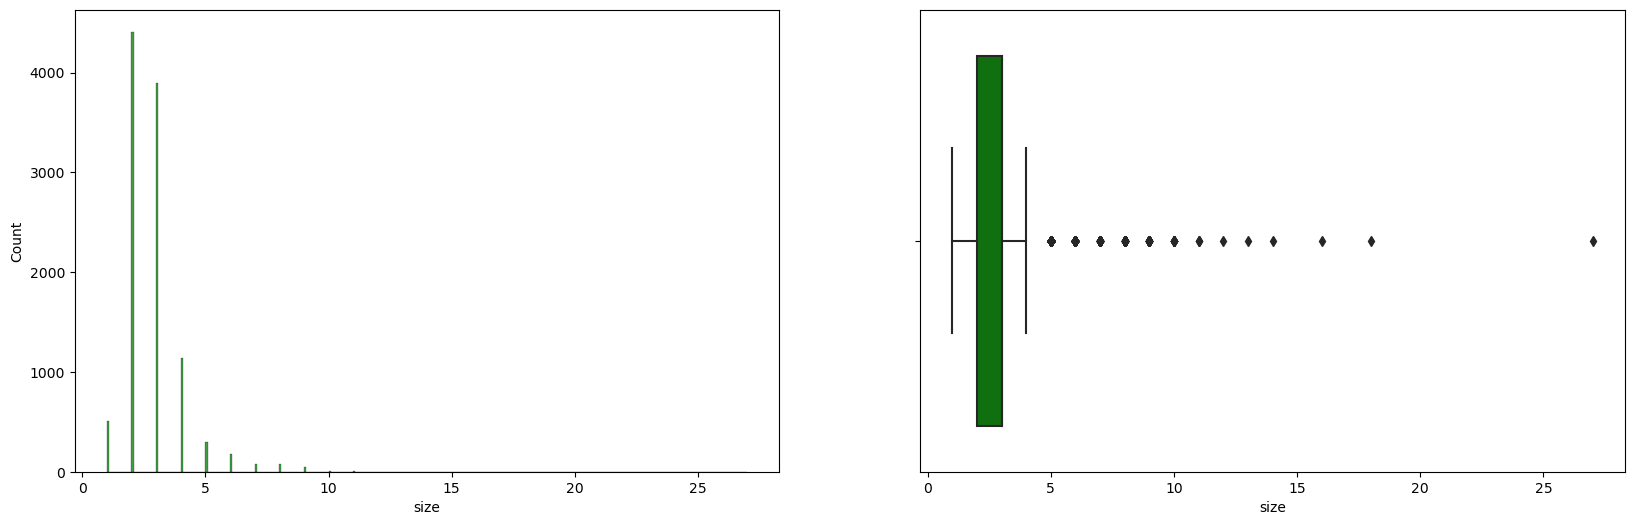

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=X_train,x='size',ax=axs[0],color='green')
sns.boxplot(x='size',data=X_train, ax=axs[1],color='green')
print('skewness :',X_train['size'].skew())
plt.show()


skewness : 4.227696763299001


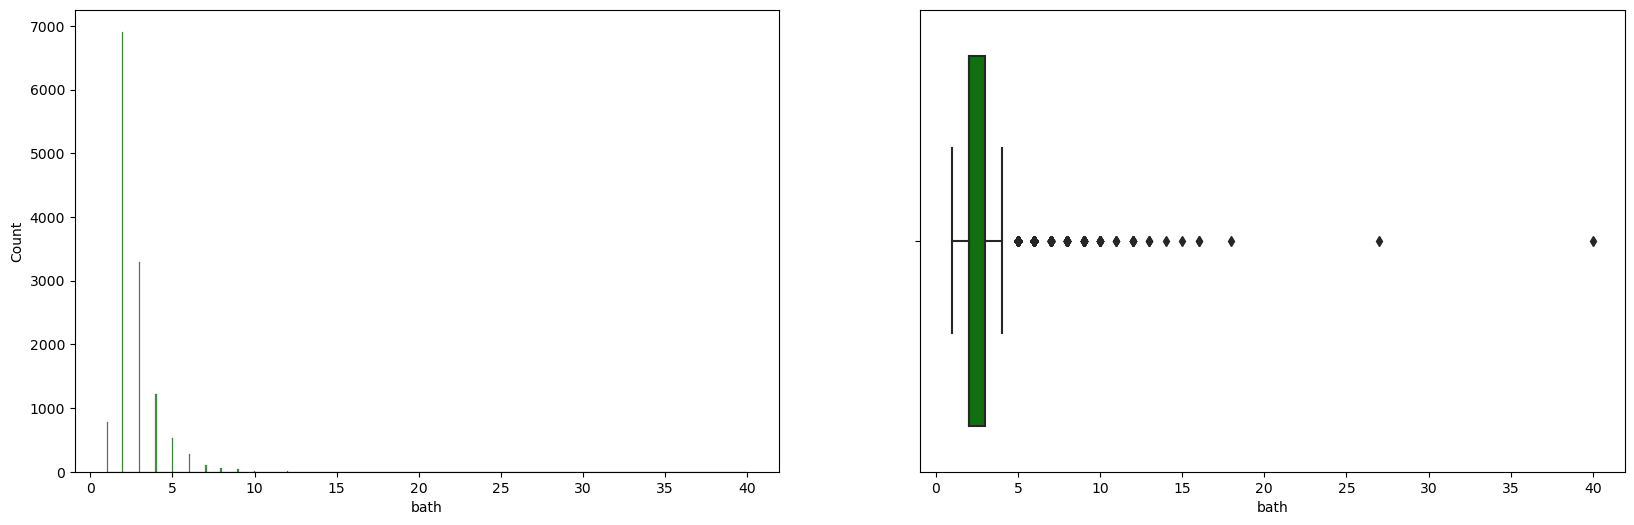

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='bath',ax=axs[0],color='green')
sns.boxplot(data=df,x='bath',ax=axs[1],color='green')
print('skewness :',df['bath'].skew())
plt.show()

skewness : 0.005856767469113565


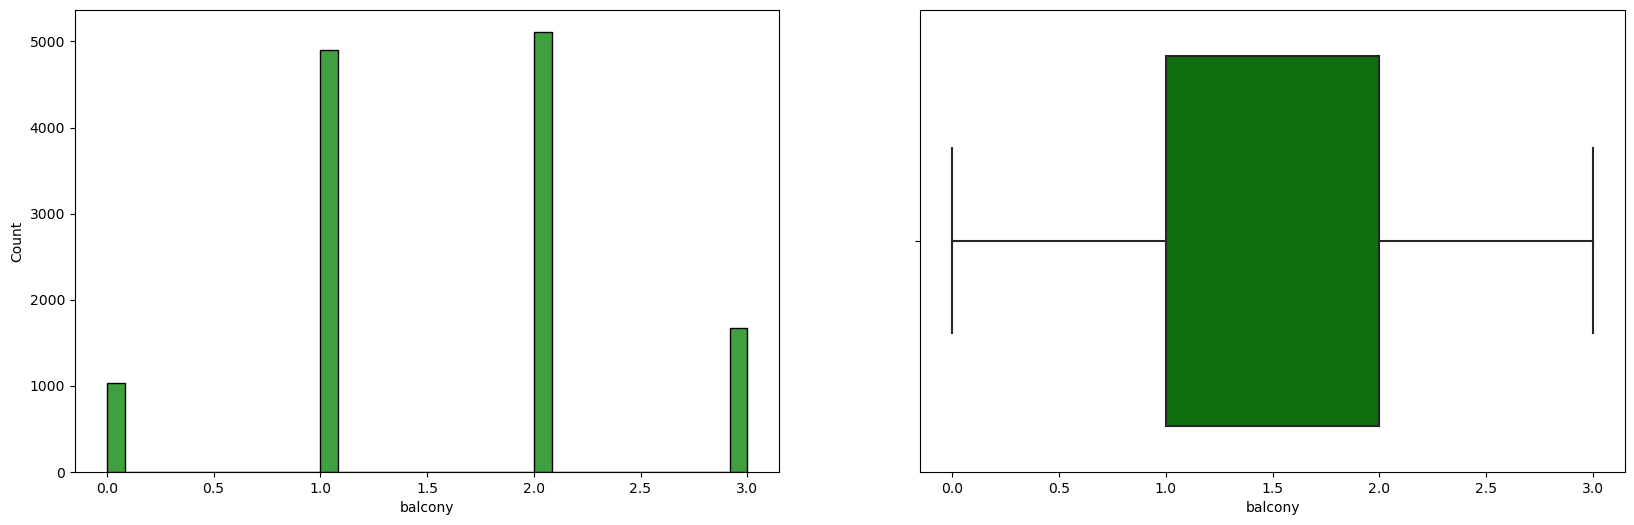

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='balcony',ax=axs[0],color='green')
sns.boxplot(data=df,x='balcony',ax=axs[1],color='green')
print('skewness :',df['balcony'].skew())
plt.show()

skewness : 15.267335905766558


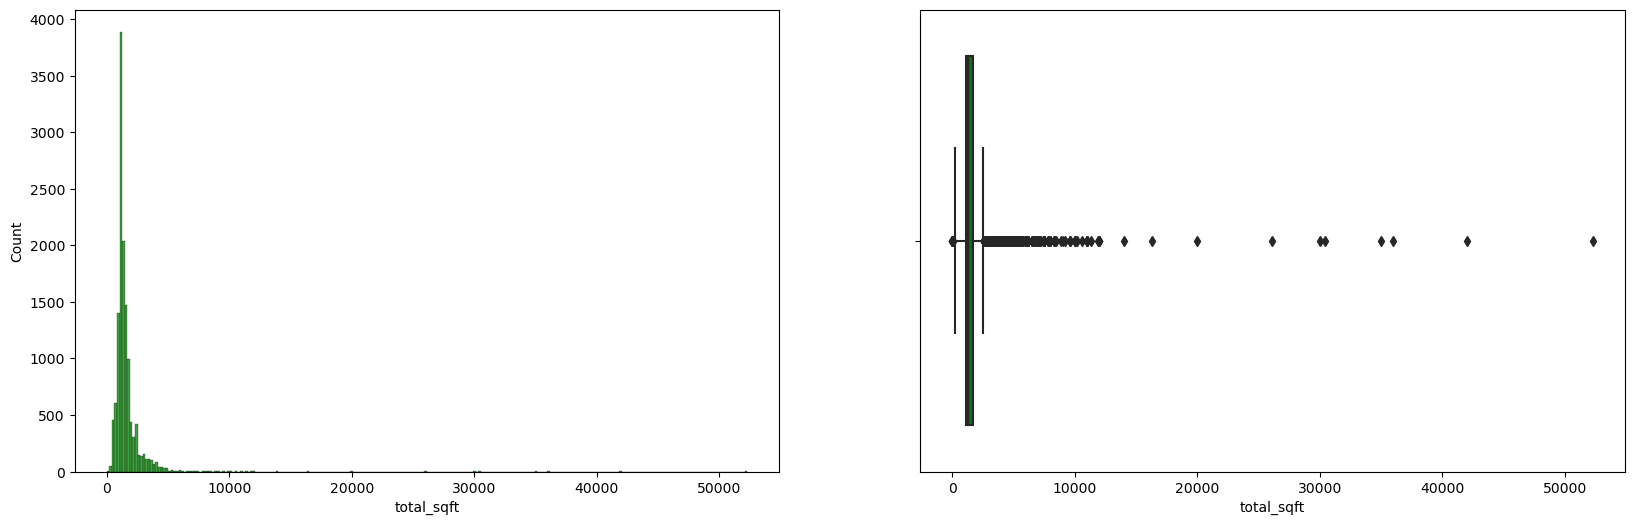

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='total_sqft',bins=250,ax=axs[0],color='green')
sns.boxplot(data=df,x='total_sqft',ax=axs[1],color='green')
print('skewness :',df['total_sqft'].skew())
plt.show()

skewness : 8.064468821273252


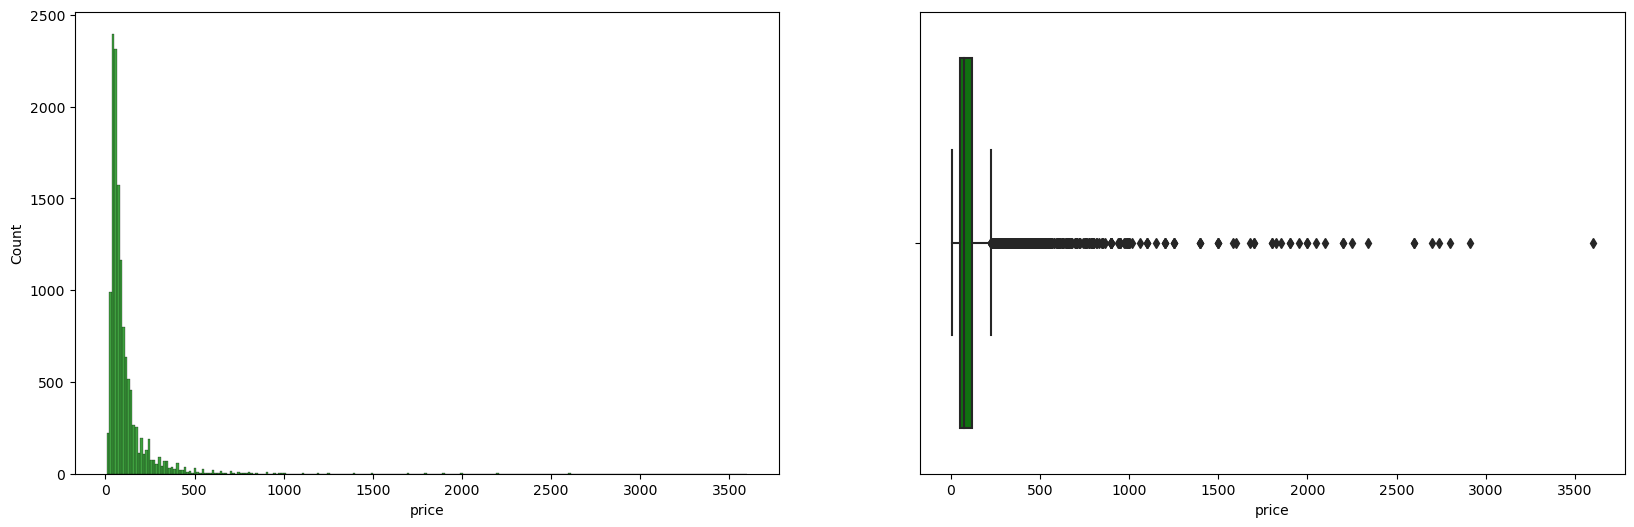

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='price',bins=250,ax=axs[0],color='green')
sns.boxplot(data=df,x='price',ax=axs[1],color='green')
print('skewness :',df['price'].skew())
plt.show()

In [28]:
df['price'].value_counts()

75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
351.00      1
54.10       1
80.64       1
32.73       1
488.00      1
Name: price, Length: 1994, dtype: int64

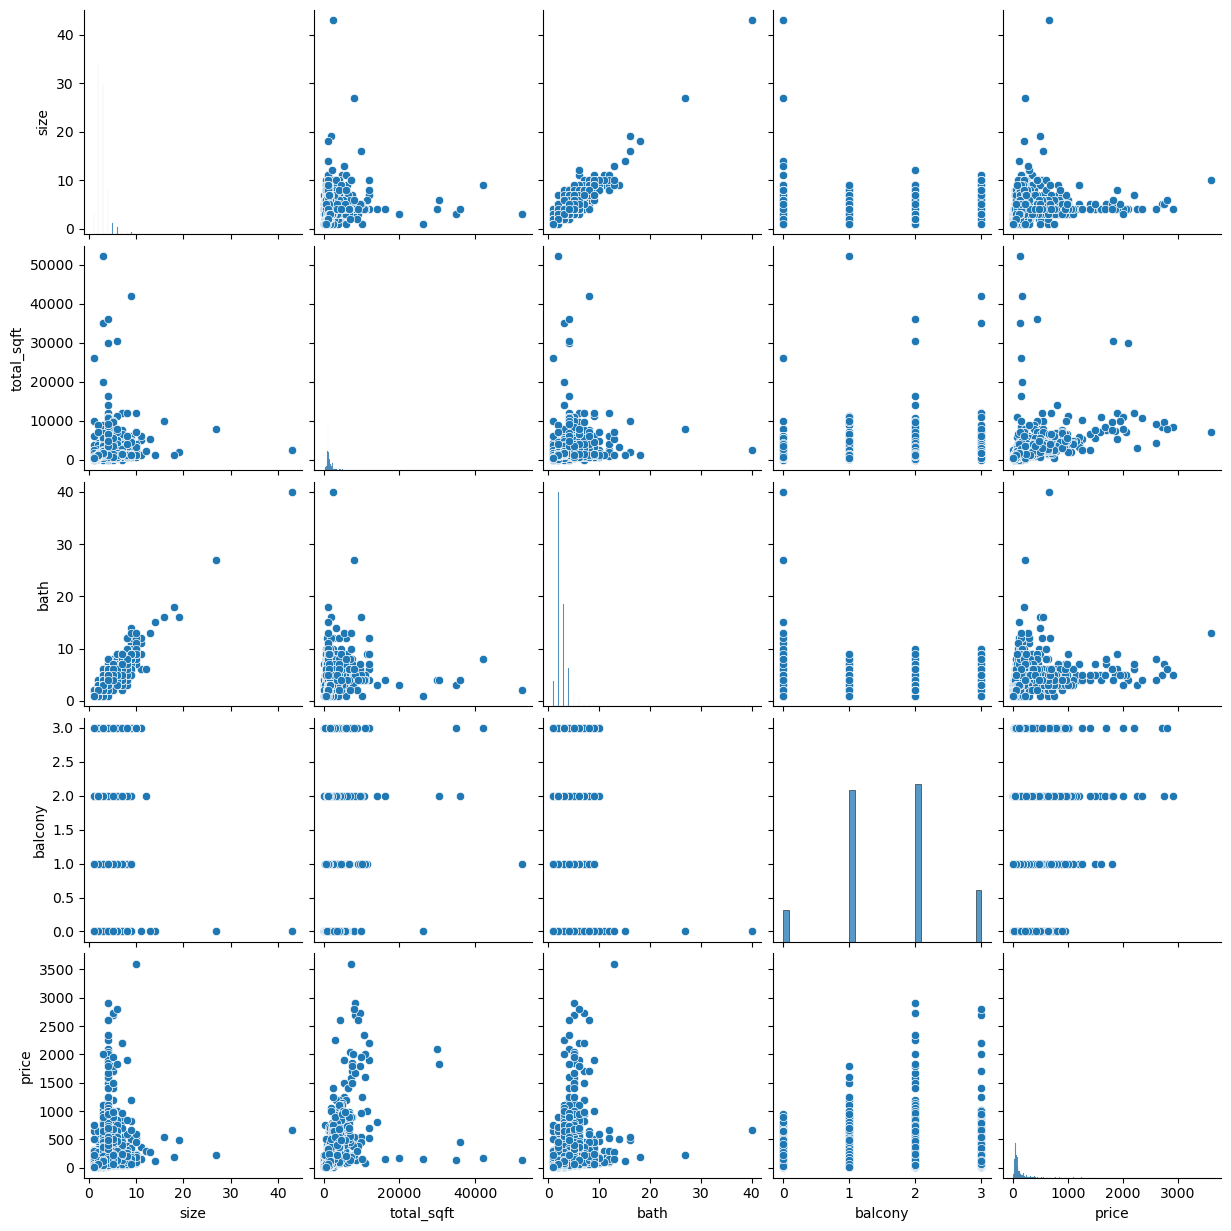

In [29]:
sns.pairplot(df)
plt.show()

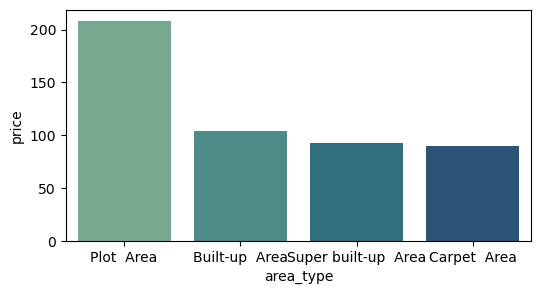

In [30]:
fig, axs = plt.subplots( figsize=(6, 3))

sns.barplot(data= df.groupby('area_type')['price'].mean().sort_values(ascending=False).reset_index(), x='area_type', y='price',palette='crest')
plt.show()

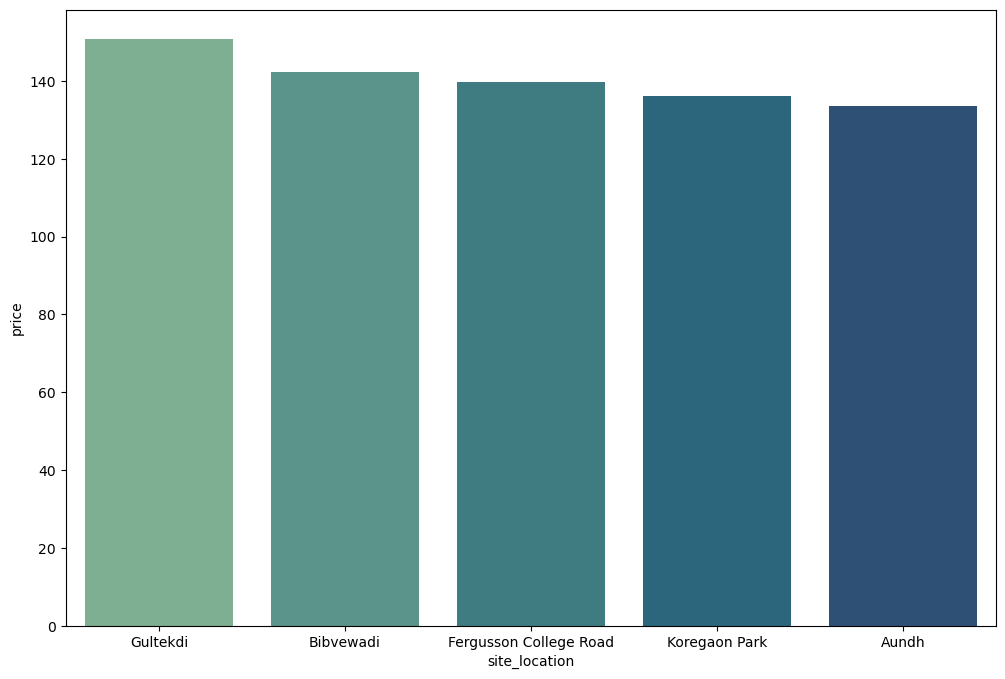

In [31]:
fig, axs = plt.subplots( figsize=(12, 8))

sorted_df = df.groupby('site_location')['price'].mean().sort_values(ascending=False).reset_index()

# Create the barplot with sorted data
sns.barplot(data=sorted_df[:5], x='site_location', y='price',palette='crest')
plt.show()

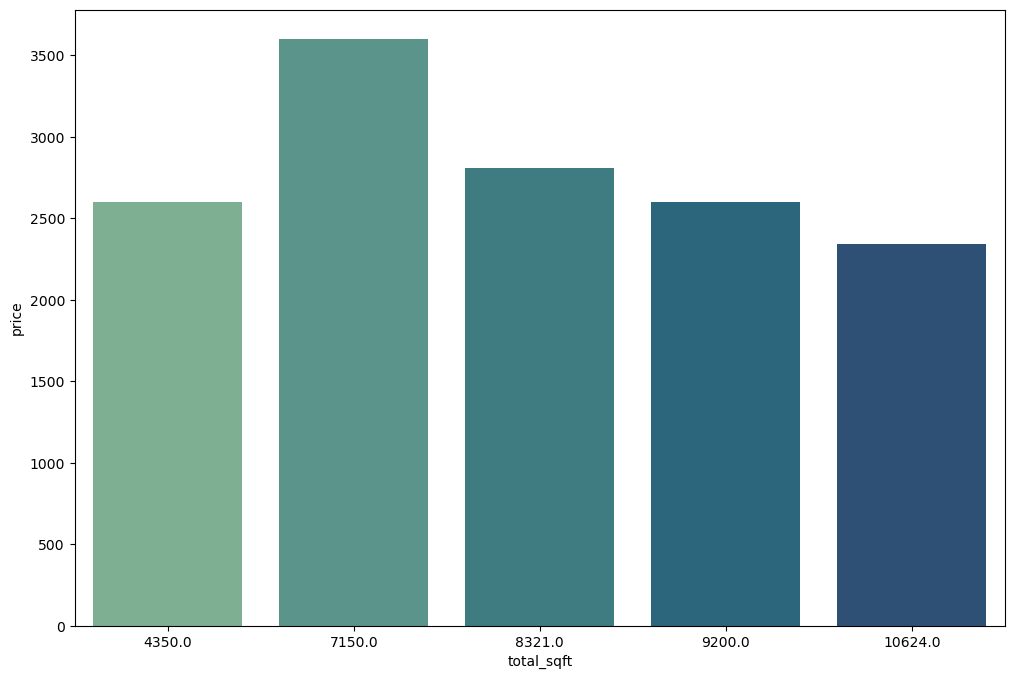

In [32]:
fig, axs = plt.subplots( figsize=(12, 8))

sorted_df = df.groupby('total_sqft')['price'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=sorted_df[:5], x='total_sqft', y='price',palette='crest')
plt.show()

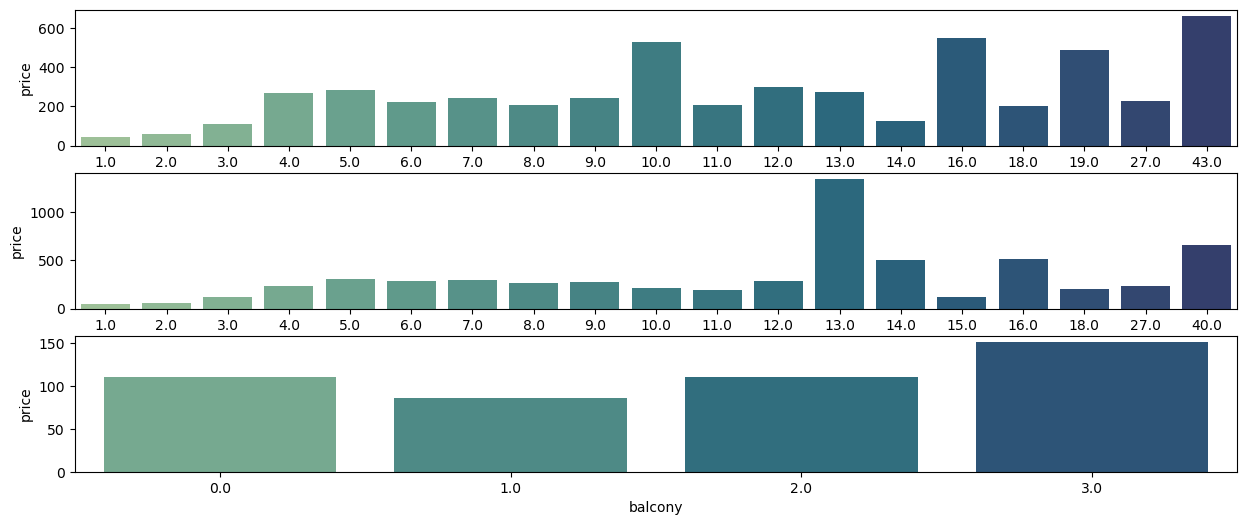

In [33]:
fig, axs = plt.subplots(3,1, figsize=(15, 6))

sns.barplot(data=df.groupby('size')['price'].mean().sort_values(ascending=False).reset_index(), x='size', y='price',ax=axs[0],palette='crest')
sns.barplot(data=df.groupby('bath')['price'].mean().sort_values(ascending=False).reset_index(), x='bath', y='price',ax=axs[1],palette='crest')
sns.barplot(data=df.groupby('balcony')['price'].mean().sort_values(ascending=False).reset_index(), x='balcony', y='price',ax=axs[2],palette='crest')

plt.show()

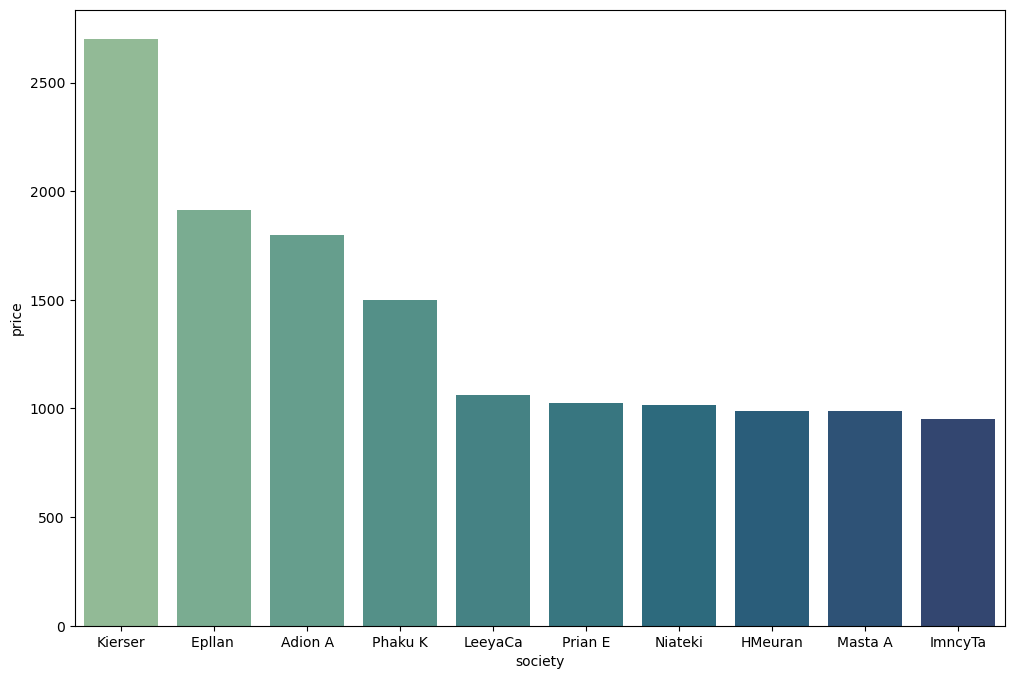

In [34]:
fig, axs = plt.subplots( figsize=(12, 8))
 
sns.barplot(data=df.groupby('society')['price'].mean().sort_values(ascending=False).reset_index()[:10], x='society', y='price',palette='crest')
plt.show()

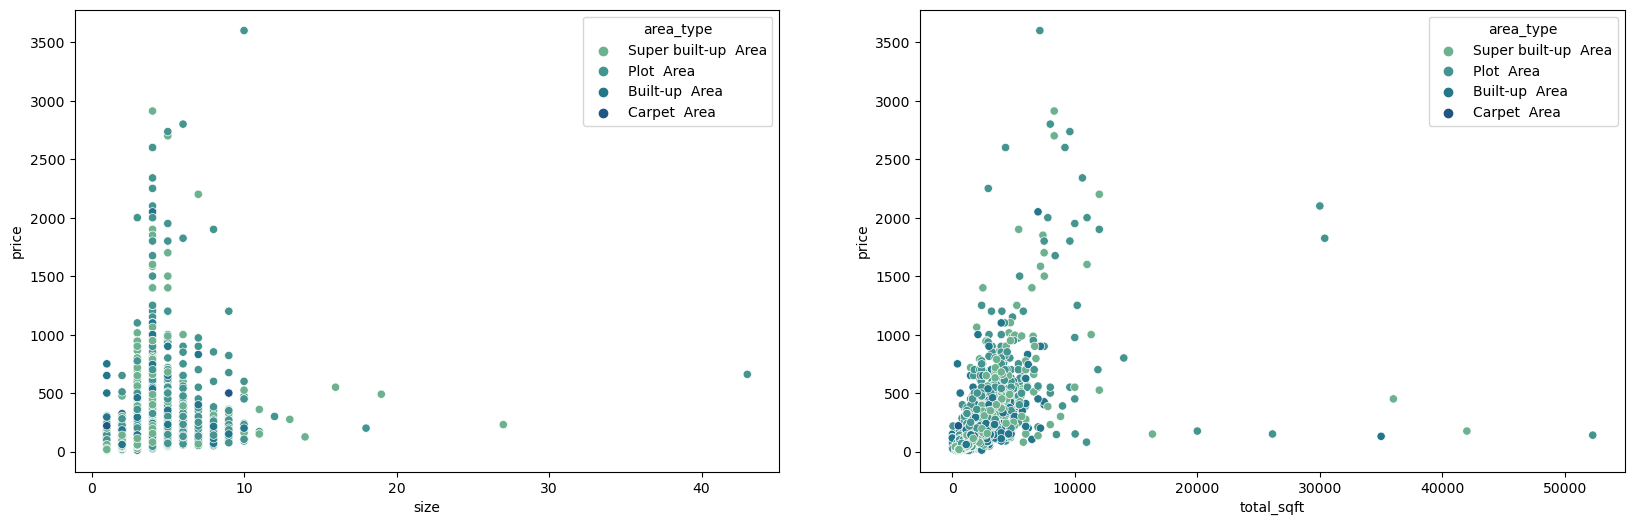

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=df,y='price',hue='area_type',x='size',ax=axs[0],palette='crest')
sns.scatterplot(data=df,y='price',hue='area_type',x='total_sqft',ax=axs[1],palette='crest')

plt.show()

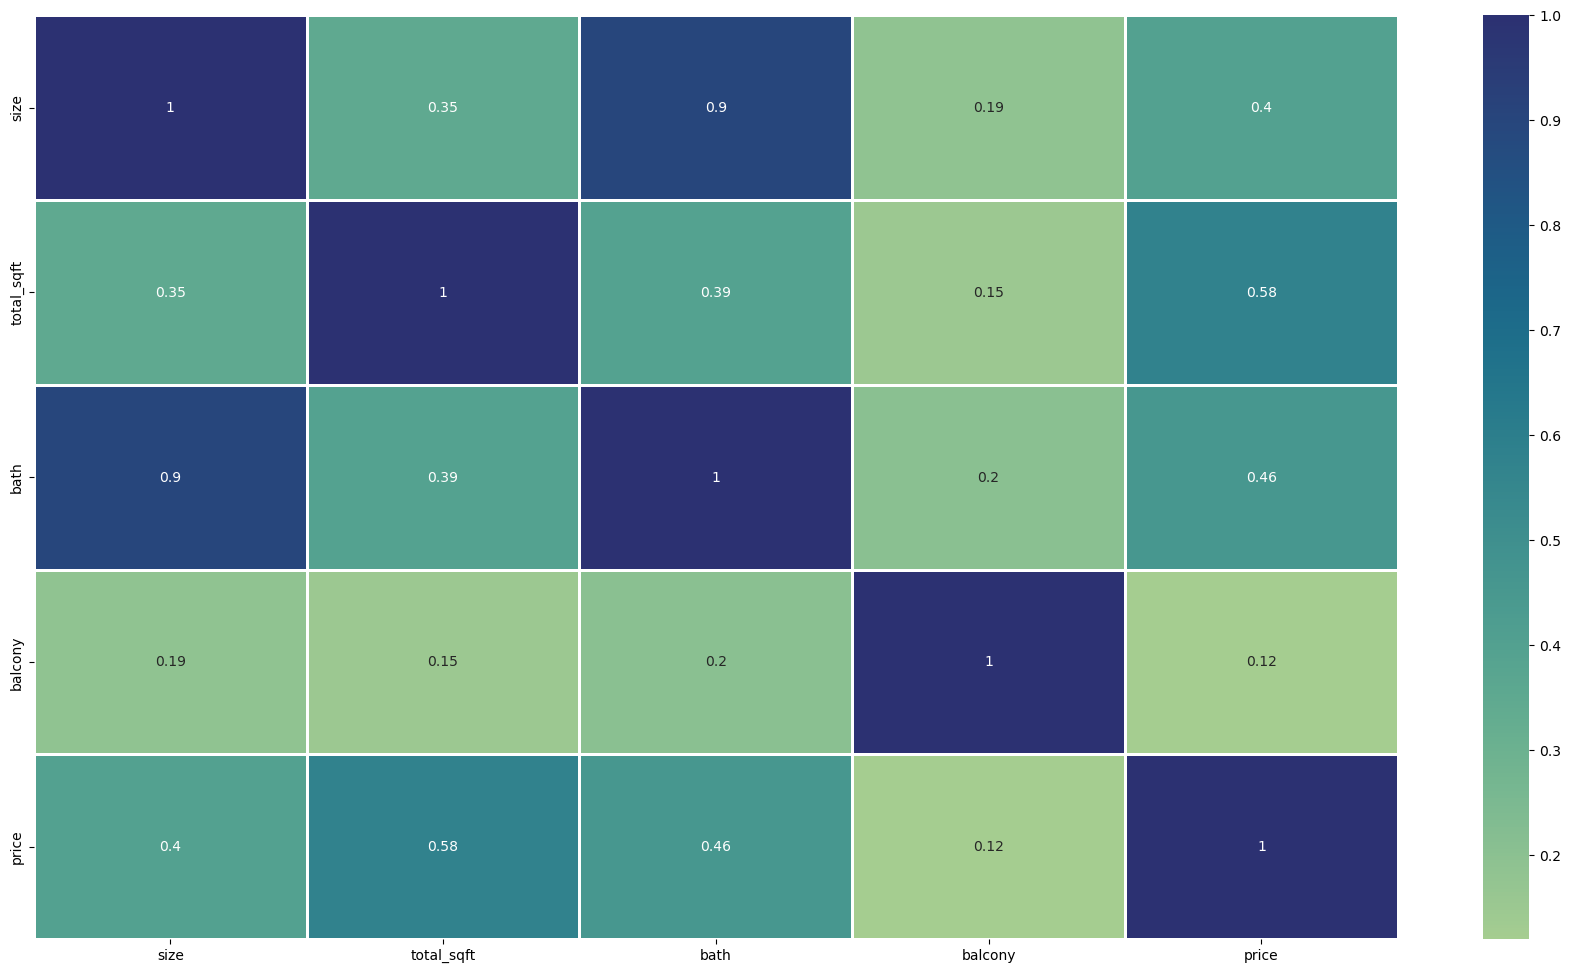

In [36]:
num_col = df.select_dtypes(include=['float64']) 
plt.figure(figsize=(22, 12))
sns.heatmap(data=num_col.corr(),linewidths=2,cmap='crest', linecolor='white', annot=True)
plt.show()

## Summery of EDA

**there are alot of outliers in size,total_sqft and price**

**Increase in total _Sqft There is an increase price**

**Increase in the size of rooms and baths There is an increase price**

**the highest number of rooms,baths and balcony are two**

**plot area has the large average price**

**Kierser society has the large average price**

**Gultikde site location has the large average price**



## Dealing with Outliers

In [37]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')

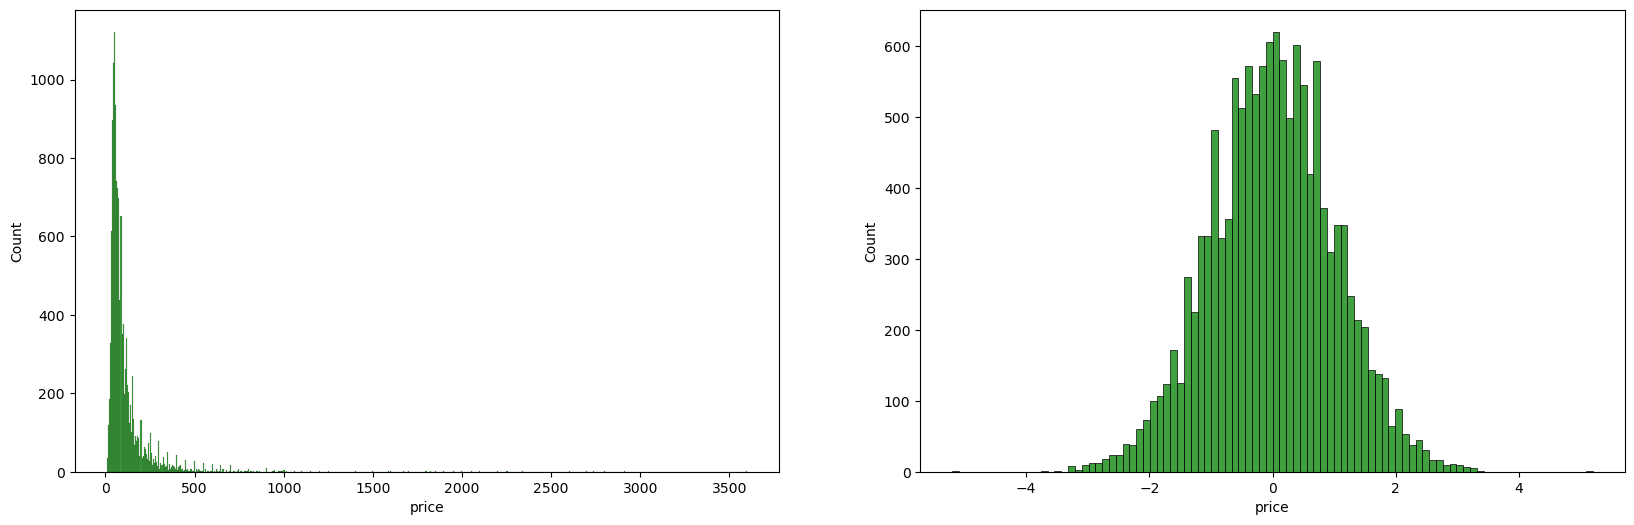

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(x='price',data=df,ax=axs[0],color='green')

df['price'] = quantile_transformer.fit_transform(df[['price']])

sns.histplot(x='price',data=df,ax=axs[1],color='green')
plt.show()

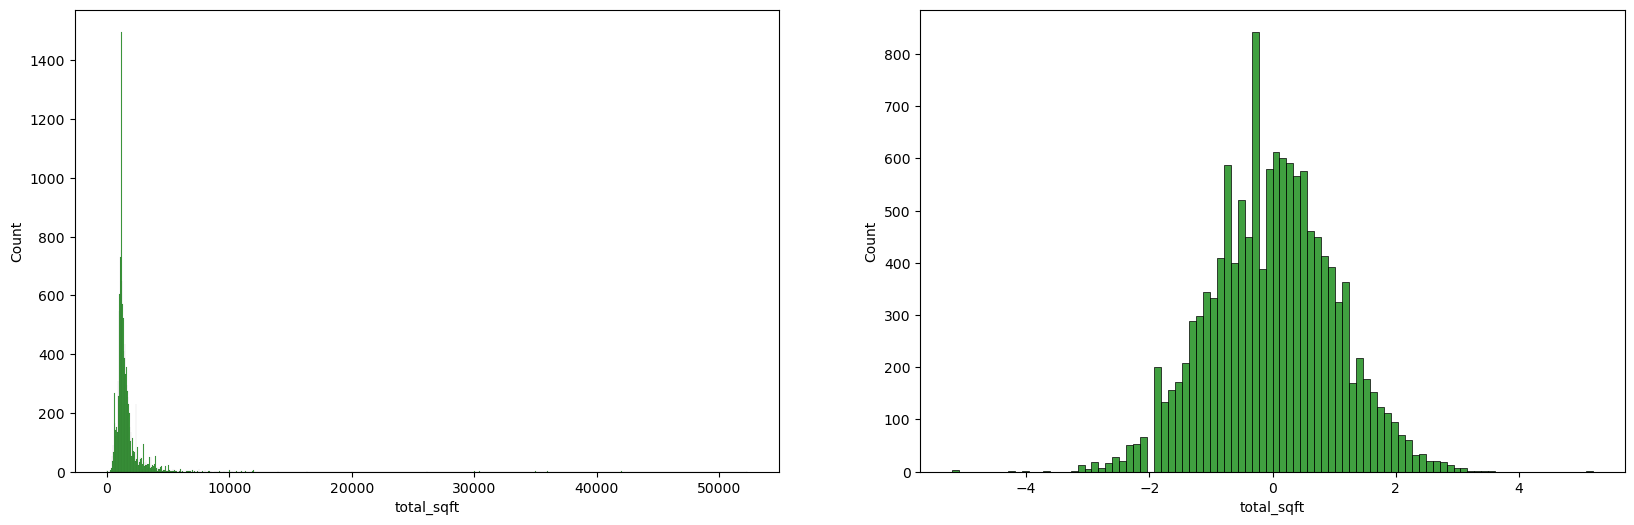

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(x='total_sqft',data=df,ax=axs[0],color='green')
df['total_sqft'] = quantile_transformer.fit_transform(df[['total_sqft']])
sns.histplot(x='total_sqft',data=df,ax=axs[1],color='green')
plt.show()

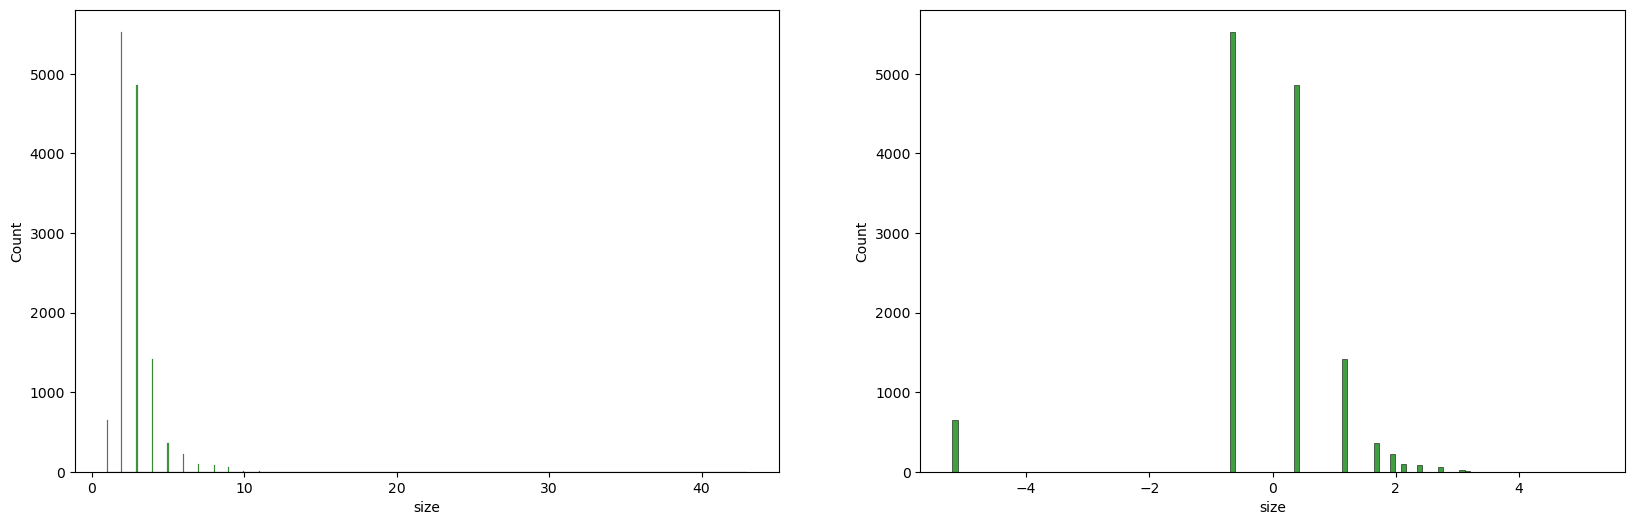

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(x='size',data=df,ax=axs[0],color='green')


df['size'] = quantile_transformer.fit_transform(df[['size']])

sns.histplot(x='size',data=df,ax=axs[1],color='green')
plt.show()

#### Feature Engineering

In [41]:
X_train['size']=X_train['balcony']+X_train['bath']+X_train['size']
X_test['size']=X_test['balcony']+X_test['bath']+X_test['size']

In [42]:
X_train.drop(columns=['bath','balcony'],inplace=True)
X_test.drop(columns=['bath','balcony'],inplace=True)

## Pipline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('quantile', QuantileTransformer(output_distribution='normal')),
 ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])


In [44]:
from sklearn.compose import ColumnTransformer
cat_col=['area_type','society','availability','site_location']
num_col=['size','total_sqft']
full_pipeline = ColumnTransformer([("num", num_pipeline, num_col),("cat", cat_pipeline, cat_col)])

In [45]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
y_train_r = quantile_transformer.fit_transform(y_train.values.reshape(-1, 1))
y_test_r = quantile_transformer.transform(y_test.values.reshape(-1, 1))


In [46]:
X_train_r = full_pipeline.fit_transform(X_train)
X_test_r = full_pipeline.transform(X_test)

## Modeling

In [47]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "SGD Regressor": SGDRegressor(),
}
results = []

for name, model in models.items():
    predict=cross_val_predict(model,X_train_r,y_train_r,cv=3)    
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_train_r, predict)
    mse = mean_squared_error(y_train_r, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train_r, predict)
    
    results.append({
        "Model Name": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

results_df = pd.DataFrame(results)

results_df

,Model Name,MAE,MSE,RMSE,R² Score
0,Linear Regression,0.366154,0.262980,0.512815,0.737501
1,Random Forest,0.365488,0.258183,0.508117,0.742288
2,Gradient Boosting,0.395786,0.269610,0.519240,0.730882
3,Decision Tree,0.433474,0.386751,0.621893,0.613955
4,SVM,0.348282,0.234912,0.484677,0.765517
5,SGD Regressor,0.441192,0.330494,0.574886,0.670110


## Fine Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4,8, 6]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train_r, y_train_r)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 8, 6],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [50]:
best_estimator=grid_search.best_estimator_

In [52]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.14974554e-01, 3.48271722e-01, 9.53453237e-03, ...,
       1.04193275e-03, 1.35252533e-03, 2.92118089e-06])

## Evaluation

In [53]:
predict=best_estimator.predict(X_test_r)
mae = mean_absolute_error(y_test_r, predict)
r2 = r2_score(y_test_r, predict)
final=[]
final.append({
        "MAE": mae,
        "R² Score": r2
    })

finalresult = pd.DataFrame(final)
finalresult

,MAE,R² Score
0,0.400757,0.71611
